In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score ##puntaje F1
from sklearn.metrics import confusion_matrix

In [33]:
df = pd.read_csv('data/drug200.csv')

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [36]:
df.shape

(200, 6)

In [37]:
print(df['Sex'].unique())
print(df['BP'].unique())
print(df['Cholesterol'].unique())
print(df['Drug'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


# Data Cleaning

In [38]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:>

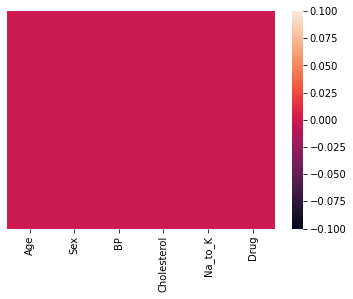

In [39]:
sns.heatmap(df.isnull(),yticklabels=False)

We have some null values.

In [40]:
duplicateRows = df[df.duplicated()]
duplicateRows # We have no duplicates

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [41]:
# Encoding variables with just two different values and the target variable
gender_encoder = LabelEncoder()
drug_encoder = LabelEncoder()


gender_encoder.fit(df['Sex'])
drug_encoder.fit(df['Drug'])


df['Sex'] = gender_encoder.transform(df['Sex'])
df['DrugEncoded'] = drug_encoder.transform(df['Drug'])

In [47]:
#Encoding ordinal variables

df.loc[df['BP']=='LOW',"BP"] = 0
df.loc[df['BP']=='NORMAL',"BP"] = 1
df.loc[df['BP']=='HIGH',"BP"] = 2

df.loc[df['Cholesterol']=='NORMAL',"Cholesterol"] = 0
df.loc[df['Cholesterol']=='HIGH',"Cholesterol"] = 1

In [62]:
# Normalizing data 
df['Age'] = (df['Age']-df['Age'].mean())/df['Age'].std()
df['Na_to_K'] = (df['Na_to_K']-df['Na_to_K'].mean())/df['Na_to_K'].std()


In [63]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugEncoded
0,-1.288358,0,2,1,1.283302,DrugY,0
1,0.162291,1,0,1,-0.414106,drugC,3
2,0.162291,1,0,1,-0.826484,drugC,3
3,-0.986139,0,1,1,-1.147084,drugX,4
4,1.008504,0,0,1,0.271114,DrugY,0


# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Drug', ylabel='count'>

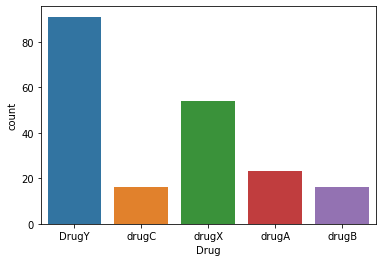

In [49]:
sns.countplot(data=df,x='Drug')

In [50]:
df.describe()

,Age,Sex,Na_to_K,DrugEncoded
count,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,16.084485,1.595000
std,16.544315,0.500854,7.223956,1.716305
min,15.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,13.936500,1.000000
75%,58.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,38.247000,4.000000


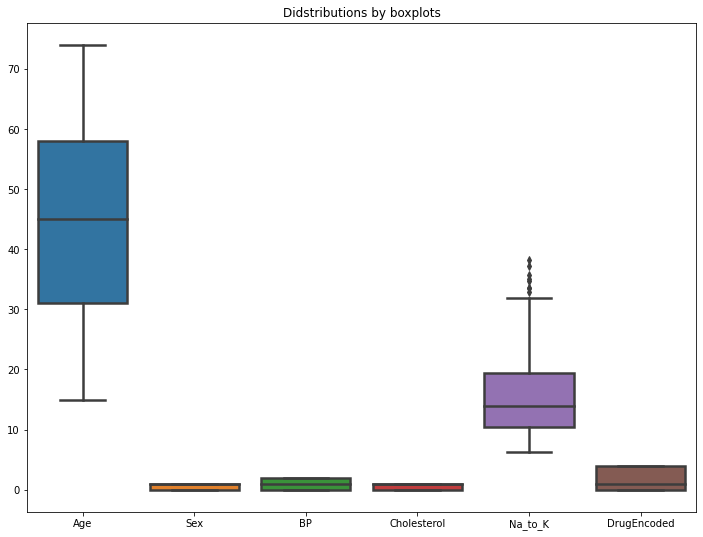

In [51]:
#looking for outliers
fig,ax = plt.subplots(figsize=(12,9))
g = sns.boxplot(data=df, linewidth=2.5, ax=ax)
plt.title('Didstributions by boxplots')
plt.show()

From the plot, we can see many outliers present in columns dur, live and spch.

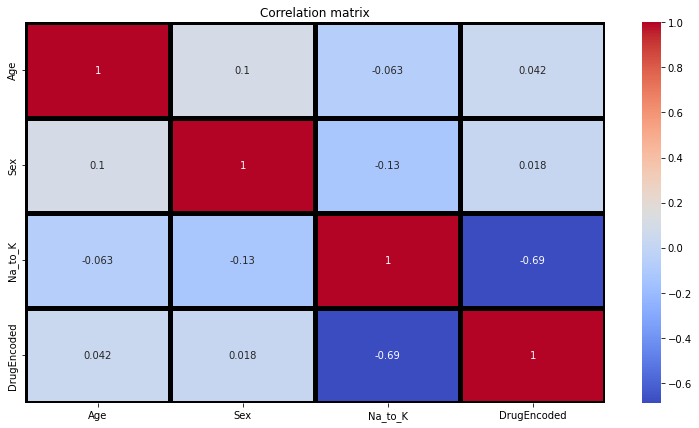

In [52]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=5,linecolor="black")
plt.title("Correlation matrix")
plt.show()

In [53]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugEncoded
0,23,0,2,1,25.355,DrugY,0
1,47,1,0,1,13.093,drugC,3
2,47,1,0,1,10.114,drugC,3
3,28,0,1,1,7.798,drugX,4
4,61,0,0,1,18.043,DrugY,0


In [64]:
X = df.drop(columns=['Drug','DrugEncoded'])
y = df['DrugEncoded']

# Random Forest

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [121]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0)
randomForestModel.fit(X_train,y_train)
rfpredict = randomForestModel.predict(X_test)

In [123]:
f1 = f1_score(y_test, rfpredict, average="macro")
print(f'F1 score : {f1}')

F1 score : 0.7714285714285715


In [124]:
confusion_matrix(y_test, rfpredict)

array([[7, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2],
       [0, 0, 0, 0, 6]])

In [136]:
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth

[10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50]

We will try to improve our model performance by tunning radom forest hyperparameters.

In [137]:
# Hyper parameters range intialization for tuning 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 8)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [138]:
#GridSearch for hyperparameter tunning
tuning_model=GridSearchCV(randomForestModel,param_grid=random_grid,cv=3,verbose=2)

In [ ]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 3240 candidates, totalling 9720 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=288; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=377; to

In [143]:
tuning_model.best_params_

{'max_depth': 11,
 'max_features': 'sqrt',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [144]:
tuning_model.best_score_

-0.7834827500636358

In [146]:
dtregressor = DecisionTreeRegressor(max_depth=11,max_features='sqrt',max_leaf_nodes=50,
                                   min_samples_leaf=1,splitter='best') # Creating decision tree regressor object
dtregressor.fit(X_train, y_train) # training decision tree regressor


DecisionTreeRegressor(max_depth=11, max_features='sqrt', max_leaf_nodes=50)

In [147]:
y_predictDTR = dtregressor.predict(X_test)

In [150]:
dtregressor.score(X_train,y_train)

0.46325862259228834

In [148]:
dtregressor.score(X_test,y_test)

0.1928211427907527

In [152]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtregressor, 
                   filled=True)

NameError: name 'tree' is not defined

<Figure size 1800x1440 with 0 Axes>